### The Problem statement:

To predict if you want to increase your sales then how the expense on each channel affects the sales and what is a way to optimise that sale?

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [2]:
df = pd.read_csv('advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### Data Description

This data is all about amount spent on advertising through different channels like TV,Radio and Newspaper.

What are the **predictors**?
- TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars).
- Radio: Advertising dollars spent on Radio.
- Newspaper: Advertising dollars spent on Newspaper.

What is the **target**?
- Sales: sales of a single product in a given market (in thousands of widgets).

### Explorary Data Analysis

In [3]:
df.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
df.tail(10)

,Unnamed: 0,TV,radio,newspaper,sales
190,191,39.5,41.1,5.8,10.8
191,192,75.5,10.8,6.0,9.9
192,193,17.2,4.1,31.6,5.9
193,194,166.8,42.0,3.6,19.6
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
df.shape

(200, 5)

The data has 200 rows and 5 columns in which 4 are features columns and 1 is target column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

**Unnamed: 0** is not makes any sense so I am going to drop this column

In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Outliers removal

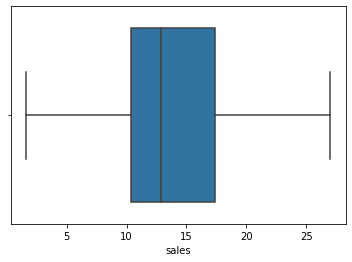

In [10]:
sns.boxplot(df.sales)
plt.show()

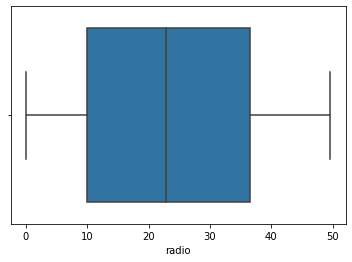

In [11]:
sns.boxplot(df.radio)
plt.show()

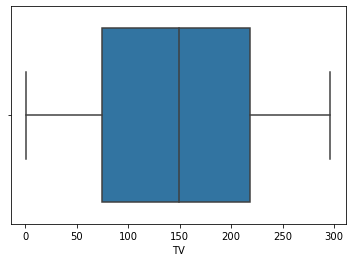

In [12]:
sns.boxplot(df.TV)
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Skewness removal

In [14]:
from scipy.stats import skew

In [15]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [16]:
skew(df['TV'])

-0.06932836662244649

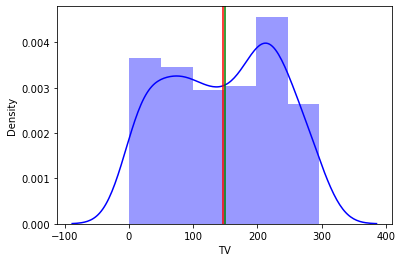

In [17]:
sns.distplot(df.TV, color='b')
plt.axvline(df.TV.mean(), color='r')  #to draw the axis on vertical line
plt.axvline(df.TV.median(), color='g')
plt.show()

In [18]:
skew(df['radio'])

0.0934668451108453

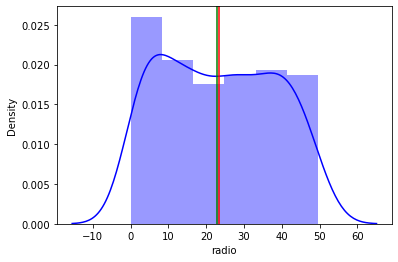

In [19]:
sns.distplot(df.radio, color='b')
plt.axvline(df.radio.mean(), color='r')  #to draw the axis on vertical line
plt.axvline(df.radio.median(), color='g')
plt.show()

In [20]:
skew(df['newspaper'])

0.8879959753085498

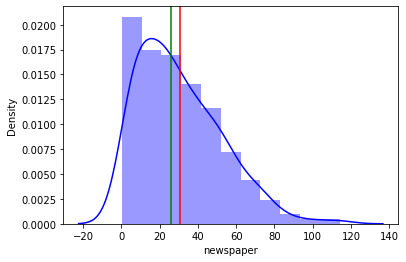

In [21]:
sns.distplot(df.newspaper, color='b')
plt.axvline(df.newspaper.mean(), color='r')  #to draw the axis on vertical line
plt.axvline(df.newspaper.median(), color='g')
plt.show()

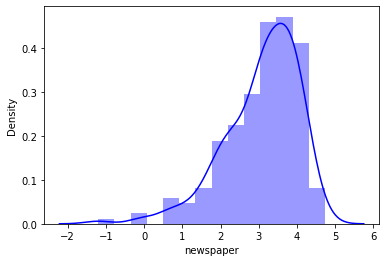

In [22]:
sns.distplot(np.log(df.newspaper), color='b')
plt.show()

In [23]:
skew(df['sales'])

0.4045082487061191

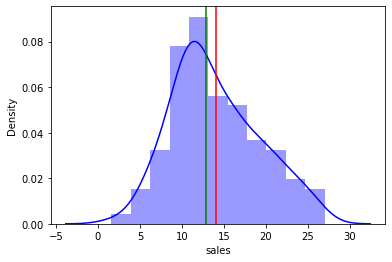

In [24]:
sns.distplot(df.sales, color='b')
plt.axvline(df.sales.mean(), color='r')  #to draw the axis on vertical line
plt.axvline(df.sales.median(), color='g')
plt.show()

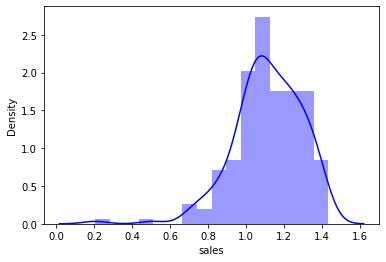

In [25]:
sns.distplot(np.log10(df.sales), color='b') #log converts any values to the normal distribution 
plt.show()

>Sales is normally distributed.

>Spending on newspaper is right skewed.

>Most of the spends o newspaper are fairly low whereas spends on TV and Radio seems to be uniform.

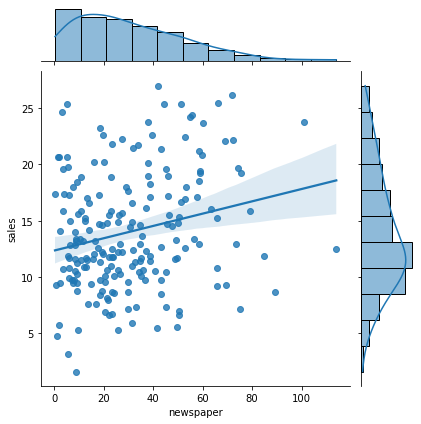

In [26]:
sns.jointplot("newspaper","sales", data=df, kind="reg")  #reg function used to plot regression line here
plt.show()

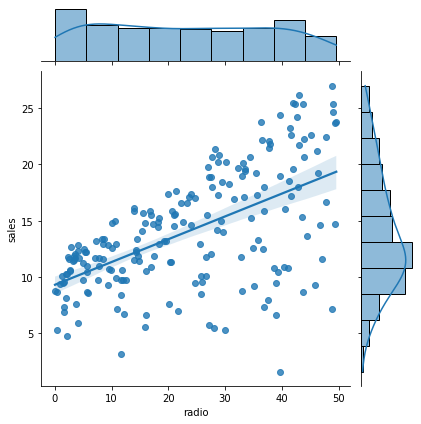

In [27]:
sns.jointplot("radio","sales", data=df, kind="reg")  #reg function used to plot regression line here
plt.show()

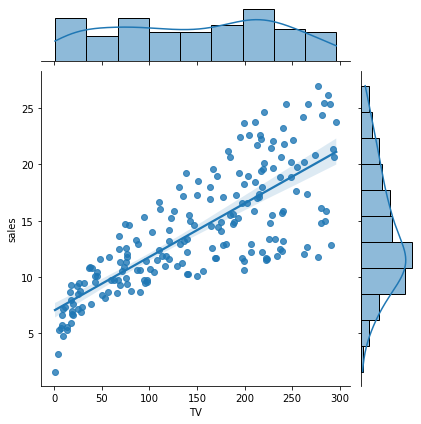

In [28]:
sns.jointplot("TV","sales", data=df, kind="reg")  #reg function used to plot regression line here
plt.show()

In [29]:
df.corr().style.background_gradient()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


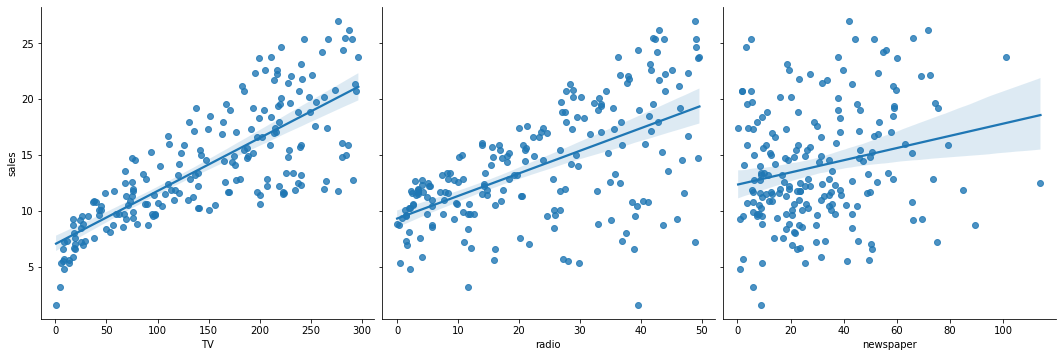

In [30]:
sns.pairplot(df, x_vars=["TV", "radio", "newspaper"], y_vars=["sales"], size=5, aspect=1, kind="reg")
plt.show()

### Observations from scatterplot

1.If your expense on TV advertisement is incraesing then your sales is also increasing

2.In case of your radio advertisement sales is increasing but your dataset is scattered that means I have to spend more money on radio advertisementy stil I am not get the sales in same proportion as compare to TV.

3.In case of a newspaper till 20 to 40 dollars I am ready to make a sales but beyond that if I am trying to increase more and more then there is no sales that means till ceartain extent you can spend on newsparer beyond that it is not a great idea to any kind of a expense.

## Questions about the data

A generic question shall be: How the company should optimise the spends on advertising to maximise the sales?

These general questions might lead you to more specific questions:
1. What’s the relationship between ads and sales?
2. How prominent is that relationship?
3. Which ad types contribute to sales?
4. How each ad contributes to sales?
5. Can sales be predicted based on the expense of the advertisement?

We will explore these questions below!

From the relationship diagrams above, it can be observed that there seems to be a linear relationship between the features TV ad,  Radio ad and the sales is almost a linear one.

Hence, we can build a model using the Linear Regression Algorithm.

In [31]:
# create X and y
feature_cols = ['TV']
x = df[feature_cols]
y = df.sales

In [32]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x, y)

LinearRegression()

In [33]:
# print intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

7.032593549127693
[0.04753664]


### Interpreting the model

How do we interpret the coefficient for spends on TV ad ($m$)?
- A "unit" increase in spends on a TV ad is **associated with** a 0.047537 "unit" increase in Sales.
- Or, an additional $1,000  on TV ads is **translated to** an increase in sales by 47.53 Dollars.

As an increase in TV ad expenditure is associated with a **decrease** in sales, $m$ would be **negative**.

## Prediction  using the model

If the expense on TV ad is $50000, what will be the sales prediction for that market?

$$y = c + mx$$
$$y = 7.032594 + 0.047537 \times 50$$

In [34]:
#calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, we would predict Sales of **9,409 widgets** in that market.

Let's do the same thing using code.

In [35]:
#  Let's create a DataFrame since the model expects it
X_test = pd.DataFrame({'TV': [50]})
X_test.head()

,TV
0,50


In [36]:
# use the model to make predictions on a new value
linreg.predict(X_test)

array([9.40942557])

### Plotting the Least Squares Line

In [37]:
# create a DataFrame with the minimum and maximum values of TV
X_test = pd.DataFrame({'TV': [df.TV.min(), df.TV.max()]})
X_test.head()

,TV
0,0.7
1,296.4


In [38]:
# make predictions for those x values and store them
y_pred = linreg.predict(X_test)
y_pred

array([ 7.0658692 , 21.12245377])

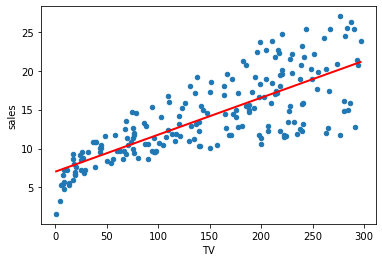

In [39]:
# first, plot the observed data
df.plot(kind='scatter', x='TV', y='sales')

# then, plot the least squares line
plt.plot(X_test.values, y_pred, c='red', linewidth=2)

## Model Confidence

**Question:** Is linear regression a low bias/high variance model or a high bias/low variance model?

**Answer:** It's a High bias/low variance model. Even after repeated sampling, the best fit line will stay roughly in the same position (low variance), but the average of the models created after repeated sampling won't do a great job in capturing the perfect relationship (high bias). Low variance is helpful when we don't have less training data! 

If the model has calculated a 95% confidence for our model coefficients, it can be interpreted as follows: 
If the population from which this sample is drawn, is **sampled 100 times**, then approximately **95 (out of 100) of those confidence intervals** shall contain the "true" coefficients.


In [40]:
import statsmodels.formula.api as smf
linreg = smf.ols(formula='sales ~ TV', data=df).fit()
linreg.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way actually to know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

### Hypothesis Testing and p-values

**Hypothesis testing** is Closely related to confidence intervals. We start with a **null hypothesis** and an **alternate hypothesis** (that is opposite to the null). Then, we check whether the data **rejects the null hypothesis** or **fails to reject the null hypothesis**.

("Failing to reject" the null hypothesis does not mean "accepting" the null hypothesis. The alternative hypothesis might indeed be true, but that we just don't have enough data to prove that.)

The conventional hypothesis test is as follows:
- **Null hypothesis:** No relationship exists between TV advertisements and Sales (and hence m equals zero).
- **Alternative hypothesis:** There exists a relationship between TV advertisements and Sales (and hence, m is not equal to zero).

How do we test this? We reject the null hypothesis (and thus believe the alternative hypothesis) if the 95% confidence interval **does not include zero**. The **p-value** represents the probability of the coefficient actually being zero.


In [41]:
# print the p-values for the model coefficients
linreg.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. 

Thus, a p-value of less than 0.05 is a way to decide whether there is any relationship between the feature in consideration and the response or not. Using 0.05 as the cutoff is just a convention.

In this case, the p-value for TV ads is way less than 0.05, and so we **believe** that there is a relationship between TV advertisements and Sales.

Note that we generally ignore the p-value for the intercept.


### How Well Does the Model Fit the data?

One of the most generic way to evaluate the fit of a linear model is by computing the **R-squared** value. R-squared explains the **proportion of variance**, i.e., the proportion of variance in the observed data which the model explains, or the reduction in error over the **null model**. (A null model only predicts the mean of all the observed responses, and thus it only has an intercept and no slope.)

The value of R-squared lies between 0 and 1. A value closer to 1 is better as it means that more variance is explained by the model.

In [42]:
# print the R-squared value for the model
linreg.rsquared

0.611875050850071

Is it a "good" R-squared value? Now, that’s hard to say. In reality, the domain to which the data belongs to plays a significant role in deciding the threshold for the R-squared value. Therefore, it's a tool for **comparing different models**.

### Multiple Linear Regression

Till now, we have created the model based on only one feature. Now, we’ll include multiple features and create a model to see the relationship between those features and the label column.
This is called **Multiple Linear Regression**.

$y = m_1x_1 + ... + m_nx_n + c$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = m_1 \times TV + m_2 \times Radio + m_3 \times Newspaper + c$

Let's use Statsmodels to estimate these coefficients

In [43]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
x = df[feature_cols]
y = df.sales

In [44]:
linreg = LinearRegression()
linreg.fit(x, y)

LinearRegression()

In [45]:
# print intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


How do we interpret these coefficients? 
If we look at the coefficients, the coefficient for the newspaper spends is negative. It means that the money spent for newspaper advertisements is not contributing in a positive way to the sales.

A lot of the information we have been reviewing piece-by-piece is available in the model summary output:

In [46]:
linreg = smf.ols(formula='sales ~ TV + radio + newspaper', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           1.58e-96
Time:                        08:00:05   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are the things to be learnt from this summary?

- TV and Radio have positive **p-values**, whereas Newspaper has a negative one. Hence, we can reject the null hypothesis for TV and Radio that there is no relation between those features and Sales, but we fail to reject the null hypothesis for Newspaper that there is no relationship between newspaper spends and sales because p-value is negative.
- The expenses on both TV and Radio ads are **positively associated** with Sales, whereas the expense on newspaper ad is **slightly negatively associated** with the Sales.
- This model has a higher value of **R-squared** (0.897) than the previous model, which means that this model explains more variance and provides a better fit to the data than a model that only includes the TV.


In [47]:
# only include TV and Radio in the model
linreg = smf.ols(formula='sales ~ TV + radio', data=df).fit()
linreg.summary() #I am able to retain the same kind of Rsquared even I have removed newspaper

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           4.83e-98
Time:                        08:00:05   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
linreg = smf.ols(formula='sales ~ TV + newspaper', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           3.95e-45
Time:                        08:00:05   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
linreg = smf.ols(formula='sales ~ TV', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           1.47e-42
Time:                        08:00:05   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
linreg = smf.ols(formula='sales ~ newspaper', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Wed, 08 Feb 2023   Prob (F-statistic):            0.00115
Time:                        08:00:05   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
linreg = smf.ols(formula='sales ~ radio', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           4.35e-19
Time:                        08:00:05   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Selecting the model with the highest value of R-squared is not a correct approach as the value of R-squared shall always increase whenever a new feature is taken for consideration even if the feature is unrelated to the response.

The alternative is to use **adjusted R-squared** which penalises the model complexity (to control overfitting), but this again generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

a better approach to feature selection is **Cross-validation.** It provides a more reliable way to choose which of the created models will best **generalise** as it better estimates of out-of-sample error. An advantage is that the cross-validation method can be applied to any machine learning model and the scikit-learn package provides extensive functionality for that.

## Multi- Collinearity

**Origin of the word:** The word multi-collinearity consists of two words:Multi, meaning multiple, and Collinear, meaning being linearly dependent on each other. 

For e.g.,
		Let’s consider this equation
		$ a+b=1  => b=1-a $
        
It means that ‘b’ can be represented in terms of ‘a’ i.e., if the value of ‘a’ 		changes, automatically the value of ‘b’ will also change. This equation 		denotes a simple linear relationship among two variables.

**Definition:** The purpose of executing a Linear Regression is to predict the value of a 	dependent variable based on certain independent variables.

So, when we perform a Linear Regression, we want our dataset to have variables which are independent i.e., we should not be able to define an 	independent variable with the help of another independent variable  	because now in our model we have two variables which can be defined based 	on a certain set of independent variables which defeats the entire purpose.

* Multi-collinearity is the statistical term to represent this type of a relation amongst the independent variable- when the independent variables are not so independent😊.
* We can define multi-collinearity as the situation where the independent variables (or the predictors) have strong correlation amongst themselves.

<img src="multicollinearity_pic.PNG" width="500">

The mathematical flow for multicollinearity can be shown as:
<img src="multicollinearity_flow.PNG" width="500">

#### Why Should We Care About Multi-Collinearity?
* The coefficients in a Linear Regression model represent the extent of change in Y when a certain x (amongst X1,X2,X3…) is changed keeping others constant. But, if x1 and x2 are dependent, then this assumption itself is wrong that we are changing one variable keeping others constant as the dependent variable will also be changed. It means that our model itself becomes a bit flawed.
* We have a redundancy in our model as two variables (or more than two) are trying to convey the same information.
* As the extent of the collinearity increases, there is a chance that we might produce an overfitted model. An overfitted model works well with the test data but its accuracy fluctuates when exposed to other data sets. 
* Can result in a Dummy Variable Trap.

##### Detection
* __Correlation Matrices and Plots:__ for correlation between all the X variables.
        
        This plot shows the extent of correlation between the independent variable. Generally, a correlation greater than 0.9 or less than -0.9 is to be avoided.
    <img src="cor.PNG" width="500">
* __Variance Inflation Factor:__ Regression of one X variable against other X variables.

     VIF=$\frac {1}{(1-R squared)}$

            The VIF factor, if greater than 10 shows extreme correlation between the variables and then we need to take care of the correlation.

#### Remedies for Multicollinearity

* **Do Nothing:** If the Correlation is not that extreme, we can ignore it. If the correlated variables are not used in solving our business question, they can be ignored.
* **Remove One Variable**: Like in dummy variable trap
* **Combine the correlated variables:** Like creating a seniority score based on Age and Years of experience
* Principal Component Analysis




Since all of our assumptions of linear regression are wrong so we have to remove the newspaper column to remove the multicollinearity. 

In [52]:
df.drop(columns='newspaper',axis=1,inplace=True)

In [53]:
df

,TV,radio,sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,9.7
197,177.0,9.3,12.8
198,283.6,42.0,25.5


In [54]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [56]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae}\nMSE : {mse}\nRMSE : {rmse}\nAccuracy : {r2}")

MAE : 1.047638679186816
MSE : 1.9147050289721788
RMSE : 1.383728668840889
Accuracy : 0.9230321850256801


### Adjusted R2 score

In [58]:
X_test.shape

(60, 2)

In [59]:
n = X_test.shape[0]
n

60

In [60]:
num = (1-r2)*(n-1)
num

4.541101083484875

In [61]:
p = X_test.shape[1]
p

2

In [62]:
den = n-p-1
den

57

In [63]:
adj_r2 = 1-(num/den)
adj_r2

0.9203315599388618

### Polynomial Regression

In [64]:
from sklearn.preprocessing import PolynomialFeatures

In [65]:
pf = PolynomialFeatures(degree=2)
X_trainp = pf.fit_transform(X_train)
X_testp = pf.fit_transform(X_test)

In [66]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_trainp, y_train)
y_pred = linreg.predict(X_testp)

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae}\nMSE : {mse}\nRMSE : {rmse}\nAccuracy : {r2}")

MAE : 0.3291835544097629
MSE : 0.17238345081004028
RMSE : 0.4151908607014854
Accuracy : 0.9930704848288281


In [68]:
X_test.shape

(60, 2)

In [69]:
n = X_test.shape[0]
n

60

In [70]:
num = (1-r2)*(n-1)
num

0.4088413950991425

In [71]:
p = X_test.shape[1]
p

2

In [72]:
den = n-p-1
den

57

In [73]:
adj_r2 = 1-(num/den)
adj_r2

0.9928273439456291